# Polynomial Regression

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

### Synthetic Data

In [78]:
# 1. Creating the real data 
x_real = np.linspace(-10,10,100) # creates 100 point line 
y_real = np.sin(x_real)
y_real

array([ 0.54402111,  0.36459873,  0.17034683, -0.03083368, -0.23076008,
       -0.42130064, -0.59470541, -0.74392141, -0.86287948, -0.94674118,
       -0.99209556, -0.99709789, -0.96154471, -0.8868821 , -0.77614685,
       -0.63384295, -0.46575841, -0.27872982, -0.0803643 ,  0.12126992,
        0.31797166,  0.50174037,  0.66510151,  0.80141062,  0.90512352,
        0.97202182,  0.99938456,  0.98609877,  0.93270486,  0.84137452,
        0.7158225 ,  0.56115544,  0.38366419,  0.19056796, -0.01027934,
       -0.21070855, -0.40256749, -0.57805259, -0.73002623, -0.85230712,
       -0.93992165, -0.98930624, -0.99845223, -0.96698762, -0.8961922 ,
       -0.78894546, -0.64960951, -0.48385164, -0.2984138 , -0.10083842,
        0.10083842,  0.2984138 ,  0.48385164,  0.64960951,  0.78894546,
        0.8961922 ,  0.96698762,  0.99845223,  0.98930624,  0.93992165,
        0.85230712,  0.73002623,  0.57805259,  0.40256749,  0.21070855,
        0.01027934, -0.19056796, -0.38366419, -0.56115544, -0.71

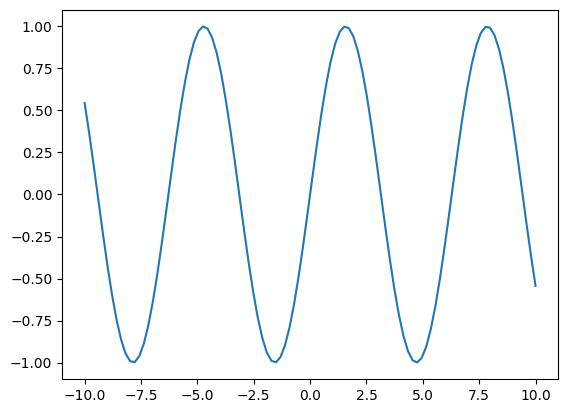

In [79]:
plt.plot(x_real, y_real)

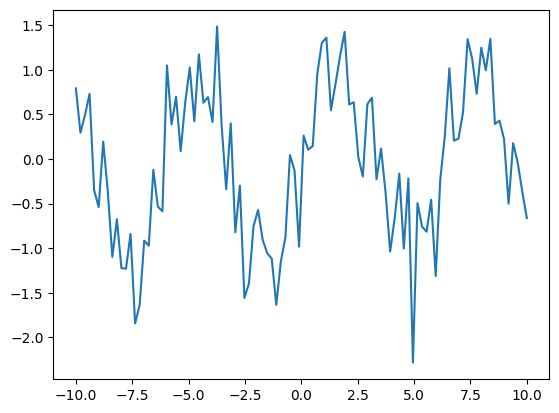

In [80]:
# 2. Now let's add some noise 
np.random.seed(42)
noise = np.random.normal(0.0, 0.5, size=y_real.shape)
y_noise = y_real + noise 
plt.plot(x_real, y_noise)

### Choose the Order of the polynomial

In [175]:
M = 13
final_range = M

In [176]:
# 3. Matricization of the data 
n = x_real.shape[0]
X = np.zeros((M+1, n))

for i in range(M+1):
    for j in range(n):
        X[i, j] = x_real[j]**i

print(X.shape)

(14, 100)


## Our Model: 
 $$  Y = W^T  X $$

In [177]:
W = np.zeros((M+1,1))
T = y_noise # target 

### Least Squares solution : 

$$ 
    W^* = ( X X^T )^-  XT 
$$

In [178]:
# 4. By least Squares method: 
W = np.linalg.inv((X @ X.T)) @ X @ T 
print(W.shape)

(14,)


In [179]:
# 5. Building the solution for training data
Y = W.T @ X 

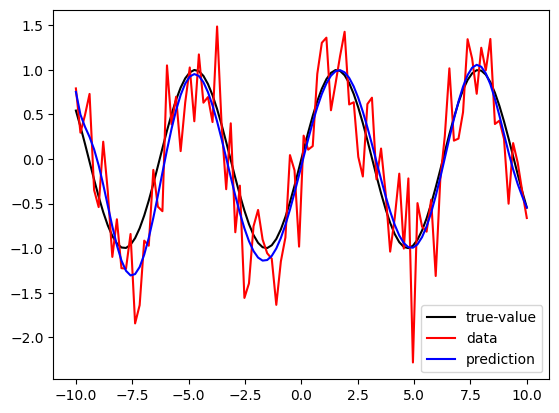

In [180]:
plt.plot(x_real, y_real, color="black", label="true-value")
plt.plot(x_real, y_noise, color="red" , label="data")
plt.plot(x_real, Y , color = "blue", label="prediction")
plt.legend()

## Evaluation : Least Squares

Here, we evaluate the least squared loss as : <br>

$$ Err = (W^T X - T)^T (W^T X - T) / 2 $$

<br>

for each order of polynomial from 0 to 10, and plot them 


In [181]:
loss_list = []

for i in range(final_range+1):
    loss = 0.0 
    M = i
    n = x_real.shape[0]
    X = np.zeros((M+1, n))
    
    for i in range(M+1):
        for j in range(n):
            X[i, j] = x_real[j]**i   
  
    W = np.zeros((M+1,1))
    T = y_noise # target 

    W = np.linalg.inv((X @ X.T)) @ X @ T 

    #Building the solution for training data
    Y = W.T @ X 

    #Loss evaluation 
    loss = 0.5 * (W.T @ X - T).T @ (W.T @ X - T) 
    loss_list.append(loss)

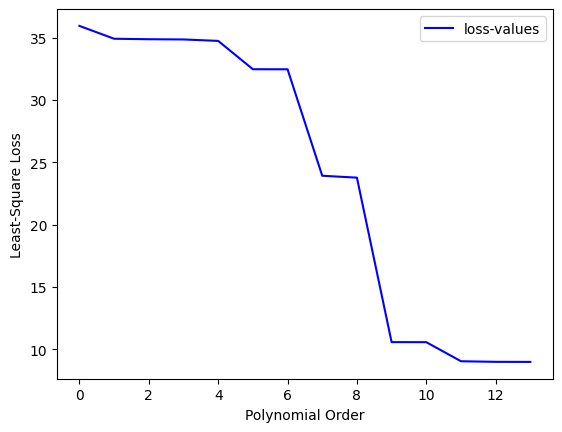

In [182]:
plt.plot(np.arange(0, final_range+1, 1), loss_list, label = "loss-values", color="blue")
plt.xlabel("Polynomial Order")
plt.ylabel("Least-Square Loss")
plt.legend()
plt.show()